# Alunos

* Arthur Severo
* Victor Le Roy

# Clustering usando K-means, AgglomerativeClustering e outros

In [545]:
# IMPORTS

import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Exercicio 1

In [546]:
# Obtendo os dados
data_path = "Data"
data_file = "data2.mat"

mat = sio.loadmat(data_path + "/" + data_file)
data = pd.DataFrame(mat["X"], columns=["X1", "X2"])

In [547]:
data

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


a. Executar o algoritmo K-means para obter 3 clusters das amostras presentes no arquivo “data2.mat”, conforme Figura 1.

![imagem1](imgs/img_clustering_1.png)

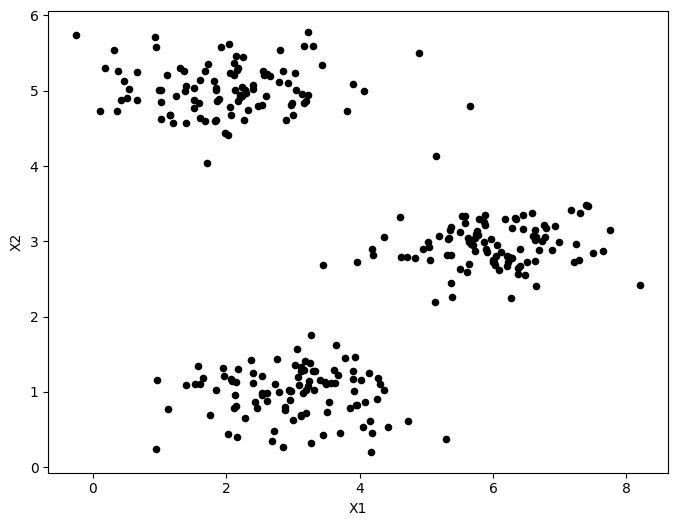

In [548]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(data["X1"], data["X2"], color="black", s=20)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [549]:
def plot_k_means(data, clusters, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=100, alpha=0.5)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

In [550]:
def k_means(data, num_clusters, max_generations):

    # Inicializando os centroides
    centroids = np.zeros((num_clusters, data.shape[1]))
    centroids[0] = data[np.random.randint(0, data.shape[0])]
    for i in range(1, num_clusters):
        distances = np.zeros((data.shape[0], i))
        for j in range(i):
            distances[:, j] = np.linalg.norm(data - centroids[j], axis=1)
        min_distances = np.min(distances, axis=1)
        min_distances = min_distances / np.sum(min_distances)
        centroids[i] = data[np.random.choice(data.shape[0], p=min_distances)]
    
    # Executando o algoritmo
    for _ in range(max_generations):
        distances = np.zeros((data.shape[0], num_clusters))
        for i in range(num_clusters):
            distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        for i in range(num_clusters):
            centroids[i] = np.mean(data[clusters == i], axis=0)
    
    return centroids, clusters

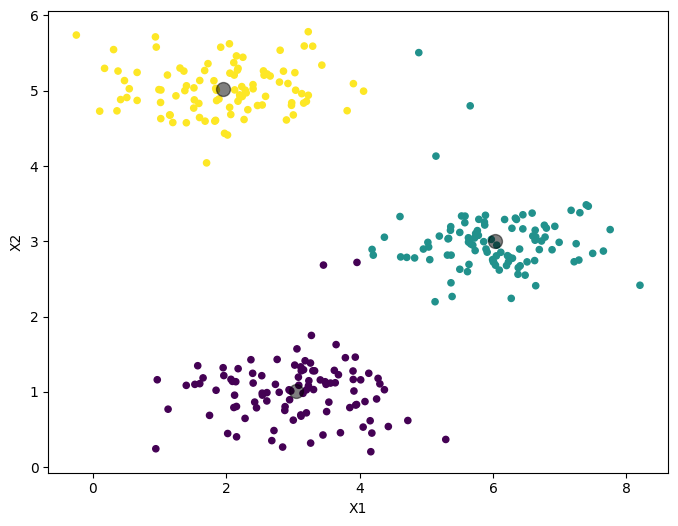

In [551]:
centroids, clusters = k_means(data.values, 3, 100)
plot_k_means(data, clusters, centroids)

b. Agora ajuste o algoritmo  K-Means para diferentes números de clusters (1 a 20)

c. Para cada modelo, armazene o número de clusters e o valor da inércia (custo)

In [552]:
def calculate_model_inertia(data, clusters, centroids):
    inertia = 0
    for i in range(data.shape[0]):
        inertia += np.linalg.norm(data.values[i] - centroids[clusters[i]]) ** 2
    return inertia

In [553]:
clusters_inertia = []
for num_clusters in range(20):
  centroids, clusters = k_means(data.values, num_clusters + 1, 100)
  inertia = calculate_model_inertia(data, clusters, centroids)
  clusters_inertia.append([num_clusters + 1, inertia])
  print("Número de clusters: %d, Inertia: %.4f" % (clusters_inertia[num_clusters][0], clusters_inertia[num_clusters][1]))

Número de clusters: 1, Inertia: 1957.6547
Número de clusters: 2, Inertia: 913.3193
Número de clusters: 3, Inertia: 266.6585
Número de clusters: 4, Inertia: 224.1906
Número de clusters: 5, Inertia: 174.7886
Número de clusters: 6, Inertia: 120.8123
Número de clusters: 7, Inertia: 108.4020
Número de clusters: 8, Inertia: 146.6640
Número de clusters: 9, Inertia: 142.6008
Número de clusters: 10, Inertia: 71.9766
Número de clusters: 11, Inertia: 73.6693
Número de clusters: 12, Inertia: 82.7275
Número de clusters: 13, Inertia: 60.7206
Número de clusters: 14, Inertia: 51.1914
Número de clusters: 15, Inertia: 46.5311
Número de clusters: 16, Inertia: 44.6214
Número de clusters: 17, Inertia: 42.9759
Número de clusters: 18, Inertia: 42.2966
Número de clusters: 19, Inertia: 38.6349
Número de clusters: 20, Inertia: 36.5305


d.  Plote  a  Inércia  (custo)  versus  Nº  de  clusters.  Parece  haver  um  número ideal de cluster (método do cotovelo - elbow?)

In [554]:
def plot_cluster_inertia(clusters_inertia):
    plt.figure(figsize=(8, 6))
    plt.plot([c[0] for c in clusters_inertia], [c[1] for c in clusters_inertia])
    plt.xlabel("Número de clusters")
    plt.ylabel("Inertia")
    plt.show()

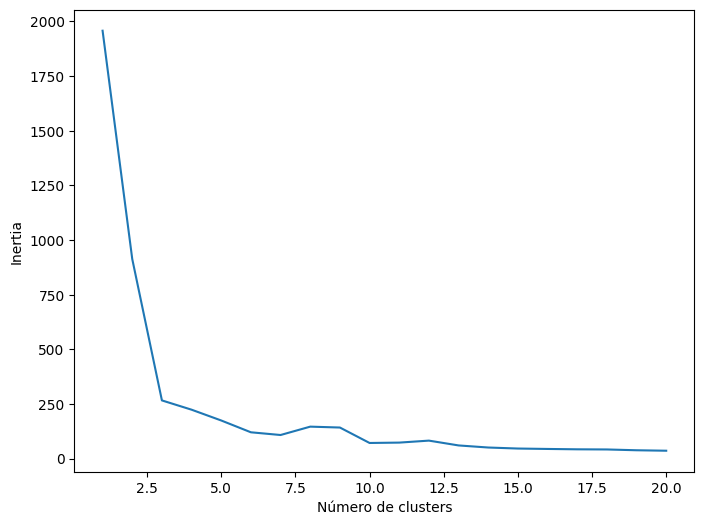

In [555]:
plot_cluster_inertia(clusters_inertia)

e. Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical  Agglomerative  Clustering)  com  três  clusters  (escolha  e teste diferentes tipos de linkage)

In [556]:
X1 = np.array(data["X1"]).reshape(-1, 1)
X2 = np.array(data["X2"]).reshape(-1, 1)

In [557]:
def plot_agg_clustering_unifying_plots(data, arr_clusters, titles=None):
    plt.figure(figsize=(16, 6))
    for i in range(len(arr_clusters)):
        plt.subplot(1, len(arr_clusters), i + 1)
        plt.scatter(data["X1"], data["X2"], c=arr_clusters[i], cmap="viridis", s=20)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title(f"{titles is not None and titles[i] or ''}")
    plt.show()

In [558]:
def plot_agg_clustering(data, clusters):
    plt.figure(figsize=(8, 6))
    plt.scatter(data["X1"], data["X2"], c=clusters, cmap="viridis", s=20)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

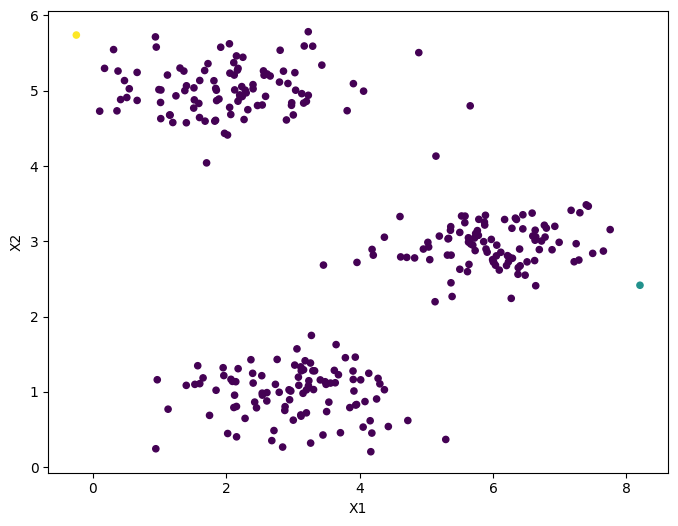

In [559]:
agg_single = AgglomerativeClustering(n_clusters=3, linkage="single")
agg_single_predict = agg_single.fit_predict(X1, X2)
plot_agg_clustering(data, agg_single_predict)

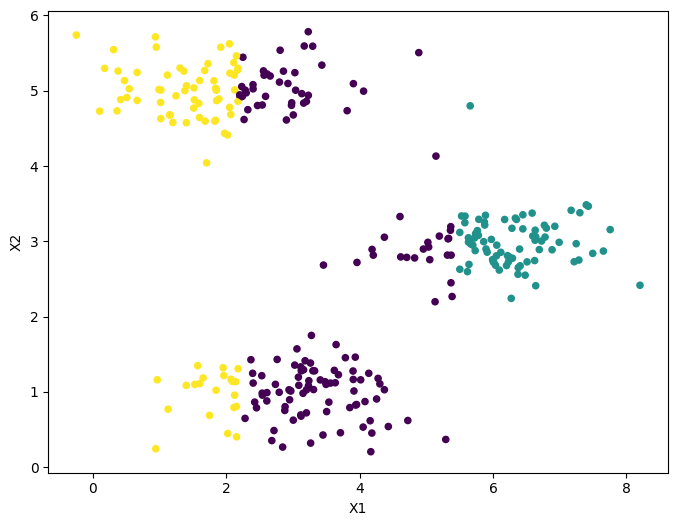

In [560]:
agg_complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
agg_complete_predict = agg_complete.fit_predict(X1, X2)
plot_agg_clustering(data, agg_complete_predict)

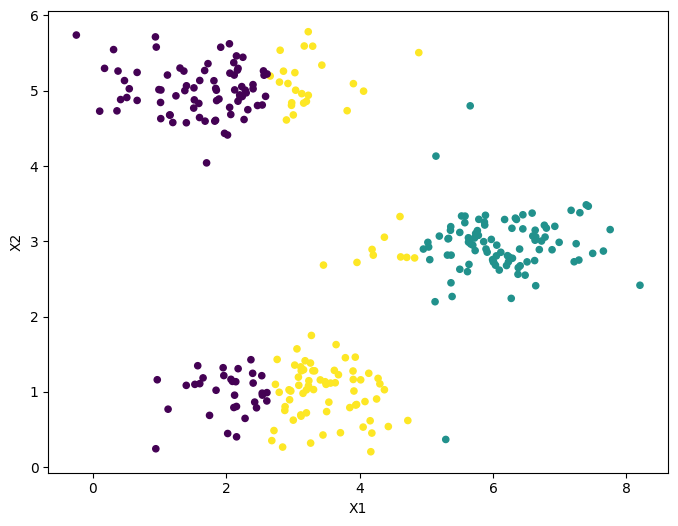

In [561]:
agg_average = AgglomerativeClustering(n_clusters=3, linkage="average")
agg_average_predict = agg_average.fit_predict(X1, X2)
plot_agg_clustering(data, agg_average_predict)

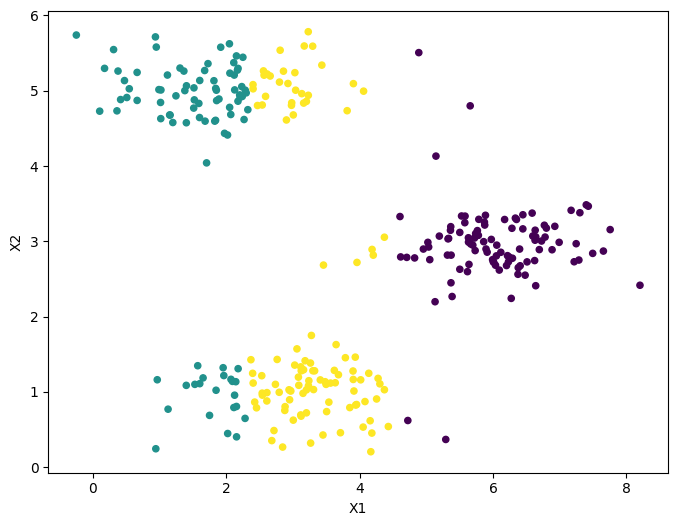

In [562]:
agg_ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
agg_ward_predict = agg_ward.fit_predict(X1, X2)
plot_agg_clustering(data, agg_ward_predict)

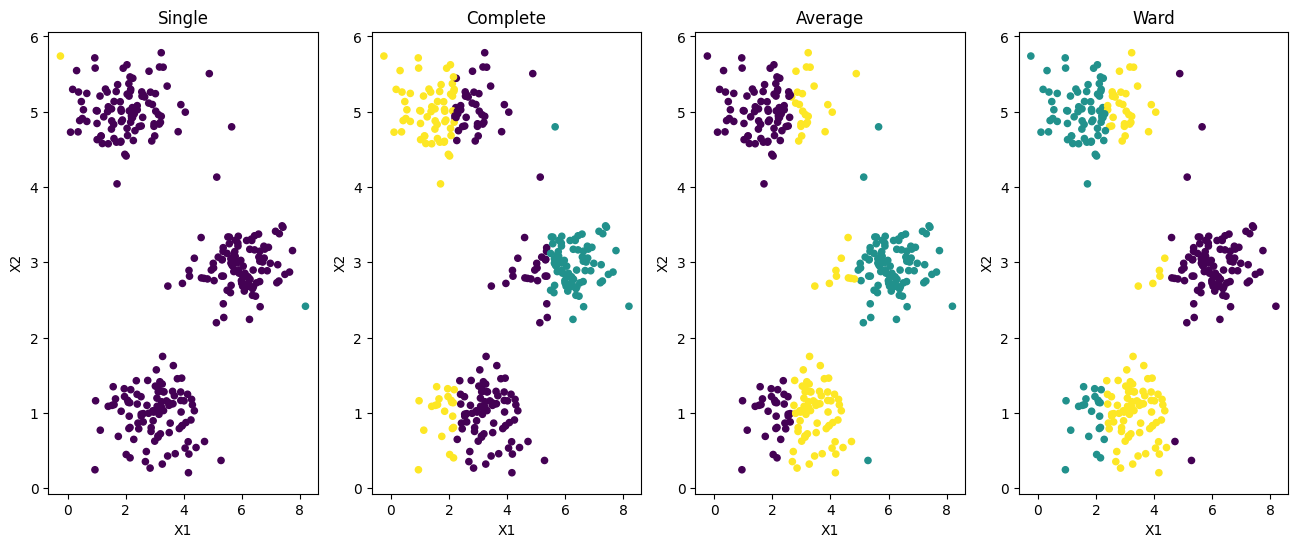

In [563]:
plot_agg_clustering_unifying_plots(data, [agg_single_predict, agg_complete_predict, agg_average_predict, agg_ward_predict], ["Single", "Complete", "Average", "Ward"])

f. Compare os resultados com os obtidos pelo k-means

* Nota-se que a forma em que os clusters formados pelo k-means parecem ser mais bem divididos ao se comparar com o do AgglomerativeClustering

* No Agglomerative vemos que, pela natureza do algoritmo, a subdivisão ficou consideravelmente diferente do k-means. Um outro ponto importante a ser considerado é que a divisão dos clusters ficaram bem definidas, com excessão do linkage `single`, que considera a distância mínima entre os elementos para gerar essa clusterização. Entre os outros três linkages, percebe-se uma similaridade entre os resultados, o que pode demonstrar que estão chegando próximos ao melhor resultado possível para a clusterização utilizando o método Agglomerative

* O k-means, por sua vez, fez uma divisão melhor dos clusters, uma vez que os centróides ficaram dispersos entre os clusters, e, por conta disso, houve uma distribuição mais bem definida.

g. Visualize o dendrograma produzido pelo método de agrupamento aglomerativo  Dica:  O  SciPy  tem  um  módulo  chamado  `cluster.hierarchy` que contém as funções de linkage    e    dendrogram    necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante

In [564]:
def plot_dendrogram(data, method="ward"):
    plt.figure(figsize=(8, 6))
    dendrogram = sch.dendrogram(sch.linkage(data, method=method))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

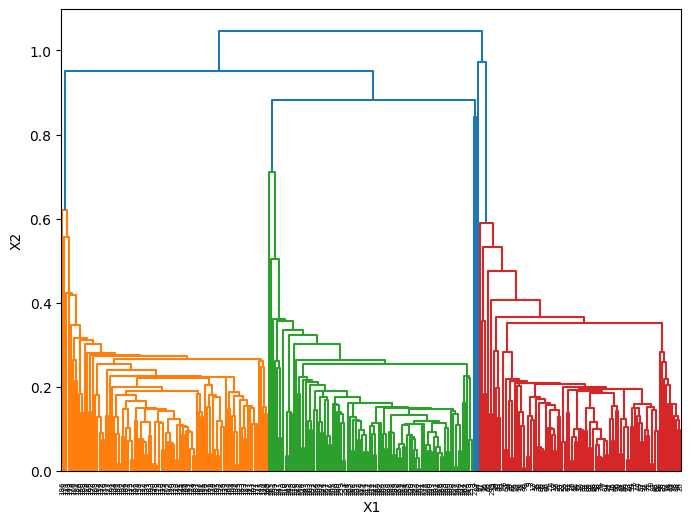

In [565]:
plot_dendrogram(data, "single")

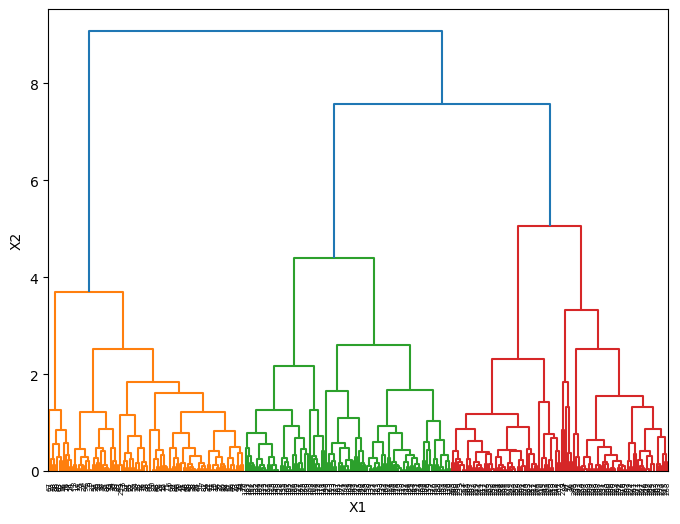

In [566]:
plot_dendrogram(data, "complete")

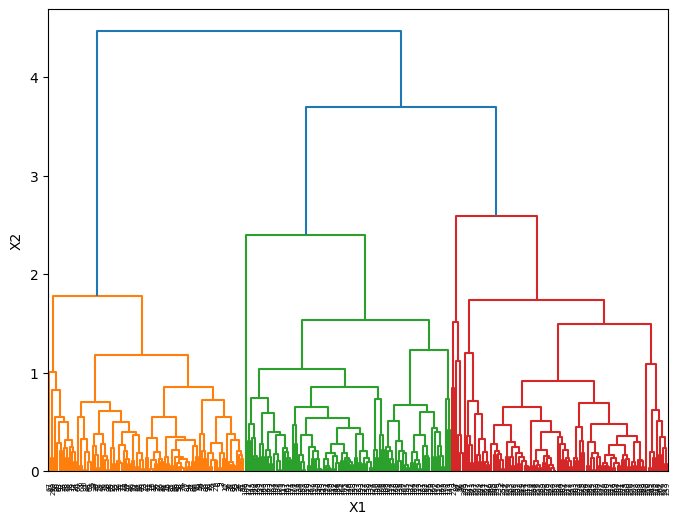

In [567]:
plot_dendrogram(data, "average")

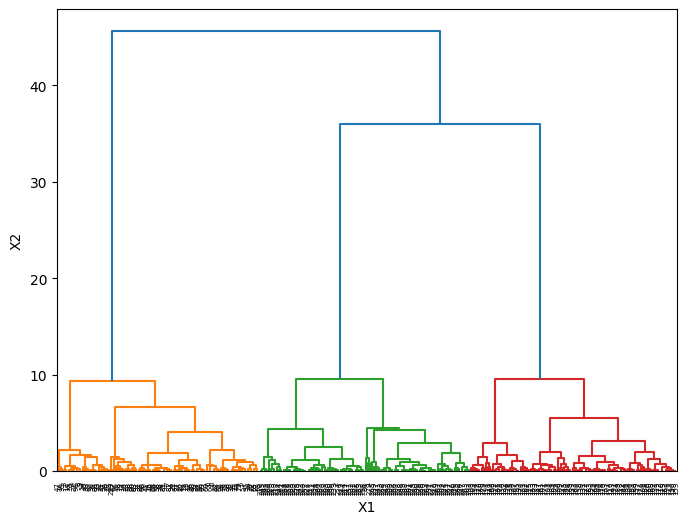

In [568]:
plot_dendrogram(data, "ward")

# Exercicio 2

In [569]:
# Obtendo os dados
data_path = "Data"
data_file = "bird_small.mat"

mat = sio.loadmat(data_path + "/" + data_file)

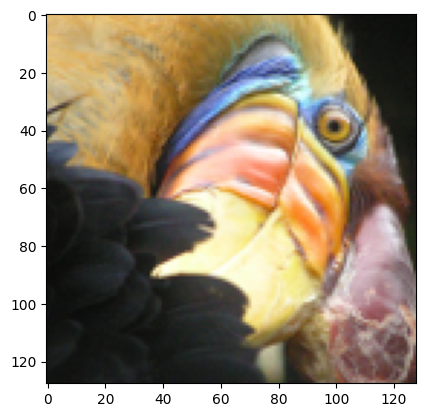

In [570]:
plt.imshow(mat["A"])

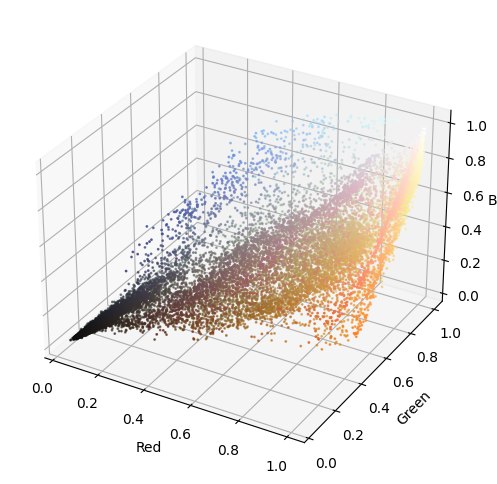

In [571]:
image_16_color = mat["A"].reshape(-1, 3) / 255

red = image_16_color[:, 0]
green = image_16_color[:, 1]
blue = image_16_color[:, 2]

plot = plt.figure(figsize=(8, 6))
ax = plot.add_subplot(111, projection="3d")
ax.scatter(red, green, blue, c=image_16_color, s=1)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

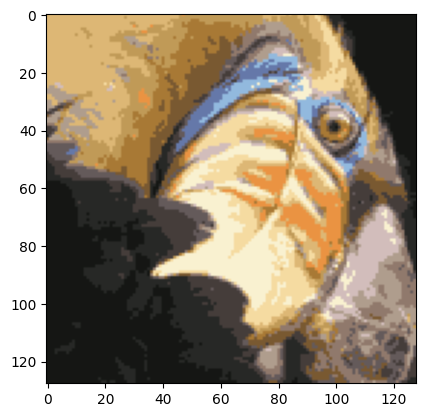

In [572]:
centroids, clusters = k_means(image_16_color, 16, 100)

image_16_color_compressed = np.zeros(image_16_color.shape)
for i in range(image_16_color.shape[0]):
    image_16_color_compressed[i] = centroids[clusters[i]]

image_16_color_compressed = image_16_color_compressed.reshape(mat["A"].shape)

plt.imshow(image_16_color_compressed)

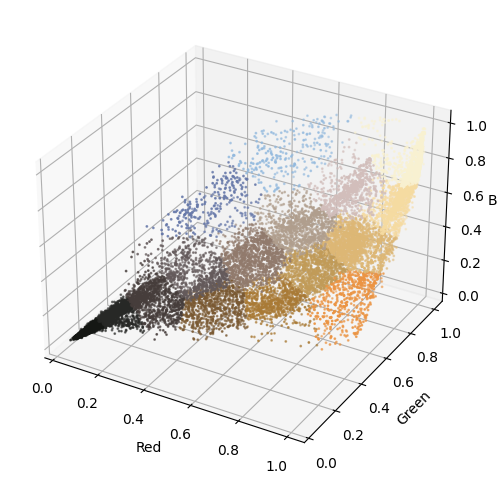

In [573]:
plot = plt.figure(figsize=(8, 6))
ax = plot.add_subplot(111, projection="3d")
ax.scatter(red, green, blue, c=image_16_color_compressed.reshape(-1, 3), s=1)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

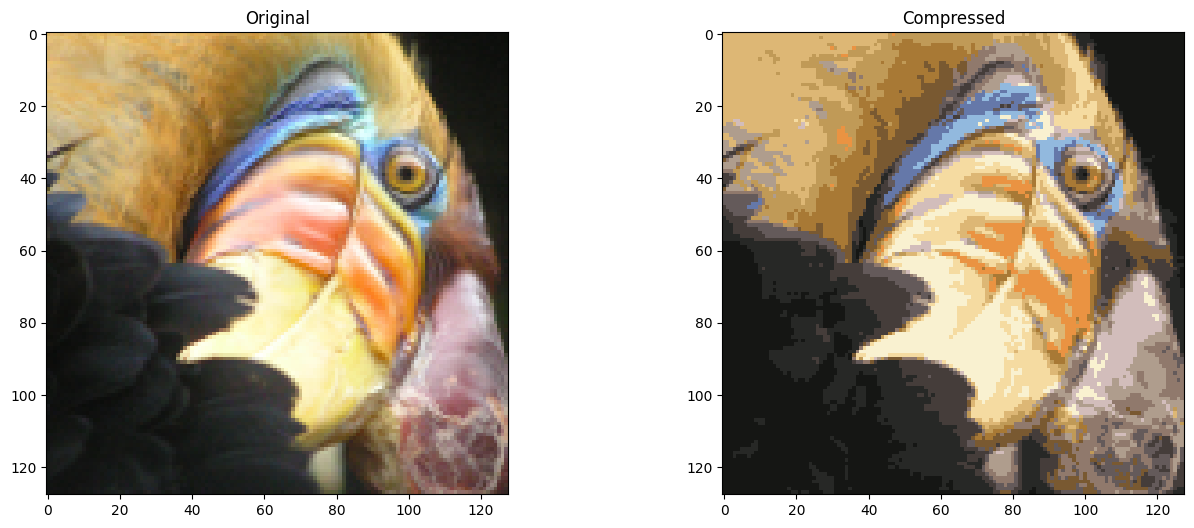

In [574]:
# Comparing both images
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(mat["A"])
plt.subplot(1, 2, 2)
plt.title("Compressed")
plt.imshow(image_16_color_compressed)
plt.show()